# Input dataset

In [ ]:
import pandas as pd 

df = pd.read_csv("/content/drive/Shared drives/DataMining_FinalProject/source/sample_1k.csv")
df

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,YEAR
0,18,6,EV,20366,EV,N17159,4438,12266,1226603,IAH,15919,1591904,XNA,1940.0,0.0,1900-1959,2122.0,0.0,0.0,0.0,438.0,2020
1,21,1,DL,19790,DL,N350NA,2496,13487,1348702,MSP,12478,1247805,JFK,2034.0,0.0,2000-2059,1.0,0.0,0.0,0.0,1029.0,2019
2,29,3,DL,19790,DL,N357NW,2114,11109,1110902,COS,10397,1039707,ATL,550.0,0.0,0600-0659,1029.0,0.0,0.0,0.0,1184.0,2020
3,7,2,B6,20409,B6,N989JT,264,14747,1474703,SEA,12478,1247805,JFK,2229.0,0.0,2200-2259,635.0,0.0,0.0,0.0,2422.0,2020
4,13,7,AS,19930,AS,N846VA,1917,12889,1288903,LAS,14771,1477104,SFO,1855.0,0.0,1900-1959,2030.0,0.0,0.0,0.0,414.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,25,6,AA,19805,AA,N409AA,1399,14107,1410702,PHX,11298,1129806,DFW,1152.0,0.0,1100-1159,1507.0,0.0,0.0,0.0,868.0,2020
996,25,6,UA,19977,UA,N77525,2122,11292,1129202,DEN,14831,1483106,SJC,1911.0,0.0,1900-1959,2053.0,0.0,0.0,0.0,948.0,2020
997,29,3,AS,19930,AS,N855VA,1321,14771,1477104,SFO,14057,1405702,PDX,649.0,0.0,0700-0759,857.0,0.0,0.0,0.0,550.0,2020
998,23,3,OO,20304,OO,N611SK,3583,13487,1348702,MSP,13232,1323202,MDW,2335.0,1.0,2000-2059,117.0,1.0,0.0,0.0,349.0,2019


In [ ]:
df.dtypes

DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
OP_UNIQUE_CARRIER         object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER                object
TAIL_NUM                  object
OP_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN                    object
DEST_AIRPORT_ID            int64
DEST_AIRPORT_SEQ_ID        int64
DEST                      object
DEP_TIME                 float64
DEP_DEL15                float64
DEP_TIME_BLK              object
ARR_TIME                 float64
ARR_DEL15                float64
CANCELLED                float64
DIVERTED                 float64
DISTANCE                 float64
YEAR                       int64
dtype: object

# Remove "CANCELLED = 1" rows

In [ ]:
tmp = df.set_index('CANCELLED')
tmp = tmp.drop(1, axis=0)
df = tmp.reset_index()

# Remove "DEP_DEL15 = 1" rows
- make predict depart time into reality depart time.


In [ ]:
tmp = df.set_index("DEP_DEL15")
tmp = tmp.drop(1,axis = 0)
df = tmp.reset_index()

# Remove redundancy & unknow attributes
- Redundancy:
> 航空公司ID ( OP_CARRIER_AIRLINE_ID ) -><- ( OP_UNIQUE_CARRIER ) \
出發機場的編號 ( ORIGIN_AIRPORT_ID ) -><- ( ORIGIN )\
出發機場的名稱 ( ORIGIN_AIRPORT_SEQ_ID ) -><- ( ORIGIN ) \
抵達機場的編號 ( DEST_AIRPORT_ID ) -><- ( DEST ) \
抵達機場的名稱 ( DEST_AIRPORT_SEQ_ID ) -><- ( DEST ) \
- unknow attributes
> ARR_TIME \
DEP_TIME

In [ ]:
reduns = ('OP_CARRIER_AIRLINE_ID', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', \
         'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'ARR_TIME', 'DEP_TIME')
for redun in reduns:
  df.drop(labels=[redun], axis=1, inplace=True)


# Remove useless attrubutes
DEP_DEL15  \
DIVERTED \
CANCELLED

In [ ]:
uselesses = ('DEP_DEL15', 'DIVERTED', 'CANCELLED')
for useless in uselesses:
  df.drop(labels=[useless], axis=1, inplace=True)

# Drop "ARR_DEL15 = NULL" rows

In [ ]:
df.dropna(subset=['ARR_DEL15'], inplace=True)

# **查看缺失值**

In [ ]:
df.isnull().sum()

DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
OP_CARRIER           0
TAIL_NUM             0
OP_CARRIER_FL_NUM    0
ORIGIN               0
DEST                 0
DEP_TIME_BLK         0
ARR_DEL15            0
DISTANCE             0
YEAR                 0
dtype: int64

# **Encoding**
航空公司編號 ( OP_CARRIER ) \
機身編號 ( TAIL_NUM ) \
出發機場名稱 ( ORIGIN ) \
抵達機場名稱 ( DEST ) \
出發時間區間 ( DEP_TIME_BLK ) 



In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

encodes = ('OP_CARRIER', 'TAIL_NUM', 'ORIGIN', 'DEST', 'DEP_TIME_BLK')
for encode in encodes:
  df[encode] = le.fit_transform(df[encode])

# Standardization
- DISTANCE

In [ ]:
from sklearn.preprocessing import StandardScaler

stands = ('DISTANCE')
features = x[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
x[col_names] = features
x
mergeDF = x.sample(n=1000, random_state=1)  
mergeDF.reset_index()
fout = open("/content/drive/Shared drives/DataMining_FinalProject/source/fileout.csv", "w")
fout.write(mergeDF.to_csv(index=False))

58330

# **長方圖**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3d72d7278>,
      dtype=object)

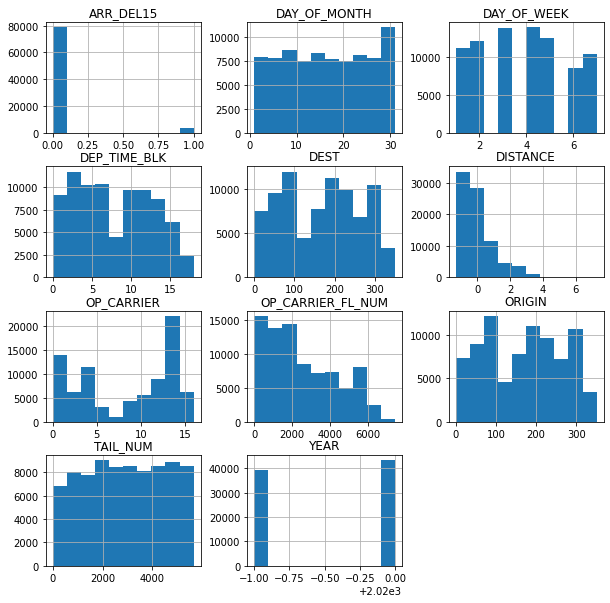

In [ ]:
x.hist(figsize = (10,10))

# **熱圖**

                   DAY_OF_MONTH  DAY_OF_WEEK  OP_CARRIER  TAIL_NUM  \
DAY_OF_MONTH           1.000000    -0.028839    0.000772  0.002459   
DAY_OF_WEEK           -0.028839     1.000000    0.000619 -0.006754   
OP_CARRIER             0.000772     0.000619    1.000000 -0.039539   
TAIL_NUM               0.002459    -0.006754   -0.039539  1.000000   
OP_CARRIER_FL_NUM     -0.022578     0.059282    0.292020 -0.001918   
ORIGIN                -0.001633     0.005732    0.038335 -0.061496   
DEST                  -0.007276     0.005003    0.045666 -0.058790   
DEP_TIME_BLK          -0.004519     0.000376   -0.000471  0.006959   
ARR_DEL15             -0.003484     0.025460   -0.020809 -0.018755   
DISTANCE              -0.012029     0.015308   -0.156395 -0.059268   
YEAR                   0.029986     0.018348    0.005739 -0.025990   

                   OP_CARRIER_FL_NUM    ORIGIN      DEST  DEP_TIME_BLK  \
DAY_OF_MONTH               -0.022578 -0.001633 -0.007276     -0.004519   
DAY_OF_WEEK

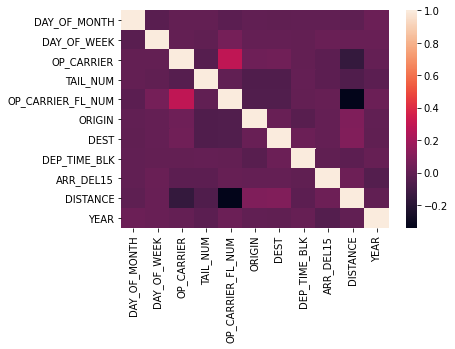

In [ ]:
import seaborn as sns
cor = x.corr()
print(cor)
_ =sns.heatmap(cor)

In [ ]:
pip install info_gain

# **Information Gain比較**

DAY_OF_MONTH 0.006726723443447736
DAY_OF_WEEK 0.002370514919154533
OP_CARRIER 0.009971606629904147
TAIL_NUM 0.14268661236060437
OP_CARRIER_FL_NUM 0.14381565197469243
ORIGIN 0.018656567395450168
DEST 0.016263387253570582
DEP_TIME_BLK 0.0015151125168296187
ARR_DEL15 0.6931471805599452
DISTANCE 0.04797641359324425
YEAR 0.0034215223470186466


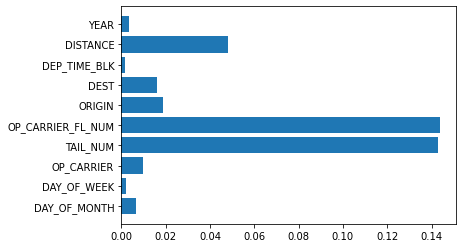

前三名 

OP_CARRIER_FL_NUM 0.14381565197469243
TAIL_NUM 0.14268661236060437
DISTANCE 0.04797641359324425


In [ ]:
from info_gain import info_gain
import operator
import matplotlib.pyplot as plt

gainList = {}
for att in x:
  gainList[att] = info_gain.info_gain_ratio(x[att], x['ARR_DEL15'])
  print(att, gainList[att])
del gainList['ARR_DEL15']
plt.barh(range(len(gainList)), list(gainList.values()), align='center')
plt.yticks(range(len(gainList)), list(gainList.keys()))                         
plt.show()
print('前三名 \n')
count = 0
for i in sorted(gainList.items(), key=lambda x: x[1], reverse=True):
  count += 1
  if count == 4: break
  print(i[0], i[1])
  

# **刪除數值低的欄位**
DEP_TIME_BLK  
DAY_OF_WEEK

In [ ]:
x.drop(labels=['DEP_TIME_BLK'],axis = 1,inplace=True)
x.drop(labels=['DAY_OF_WEEK'],axis = 1,inplace=True)

# **主成分個數與主成分個數對數據總體的方差比率圖**

Text(0.5, 0, 'Component Number')

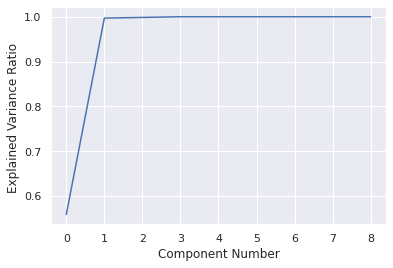

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_));
plt.ylabel('Explained Variance Ratio ')  
plt.xlabel('Component Number')

# **採樣數據(2:1)**

In [ ]:
targetAttr = 'ARR_DEL15'
samplingRatio = 2

arr_0 = x.set_index(targetAttr).drop(index=1.0)
arr_1 = x.set_index(targetAttr).drop(index=0.0)

sam_arr_0 = arr_0[:].sample(n=(int(len(arr_1)*samplingRatio)), random_state=1)
sam_arr_1 = arr_1[:].sample(n=len(arr_1), random_state=1)
x= pd.concat([sam_arr_0, sam_arr_1]).reset_index()
x

,ARR_DEL15,DAY_OF_MONTH,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,DISTANCE,YEAR
0,0.0,19,14,3147,5322,313,315,-0.670132,2020
1,0.0,30,11,2545,5218,155,69,-0.808888,2020
2,0.0,20,4,4955,1400,136,19,-0.835962,2020
3,0.0,22,14,4426,2785,158,253,0.118407,2020
4,0.0,1,11,2414,5489,23,69,-1.199773,2019
...,...,...,...,...,...,...,...,...,...
12016,1.0,13,12,127,5350,157,41,1.153999,2020
12017,1.0,7,4,1287,1847,226,315,1.221685,2019
12018,1.0,2,14,1858,6253,86,200,-0.813964,2019
12019,1.0,31,1,4904,2430,332,90,0.218244,2019


# **刪除ARR_DEL15**

In [ ]:
test = x.ARR_DEL15
x.drop(labels=['ARR_DEL15'], axis = 1, inplace=True)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12016    1.0
12017    1.0
12018    1.0
12019    1.0
12020    1.0
Name: ARR_DEL15, Length: 12021, dtype: float64

# **PCA(n_component = 3)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_pca_data = pca.fit_transform(x)
X_pca_data = pca.inverse_transform(x_pca_data)
x_pca = pd.DataFrame(data = x_pca_data, columns = range(x_pca_data.shape[1]))

# **資料分割(8:2)**

In [ ]:
from sklearn.model_selection import train_test_split
x_att = x_pca
y_ans = test

x_train , x_test, y_train, y_test = train_test_split(x_att, y_ans, test_size = 0.2, random_state =1)

list1 = [x_train, x_test, y_train, y_test]
print(list1)
#x_pca

# **訓練模型**

# **Decision Tree**

In [ ]:
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, confusion_matrix, classification_report
import pydotplus
from IPython.display import Image

DecidionTree
訓練集正確率:  1.0
測試集正確率:  0.5713097713097713
訓練集混淆矩陣: 
 [[6415    0]
 [   0 3201]]
測試集混淆矩陣: 
 [[1085  514]
 [ 517  289]]


[Text(167.4, 163.07999999999998, 'X[1] <= -2705.837\ngini = 0.444\nsamples = 9616\nvalue = [6415, 3201]'),
 Text(83.7, 54.360000000000014, '\n  (...)  \n'),
 Text(251.10000000000002, 54.360000000000014, '\n  (...)  \n')]

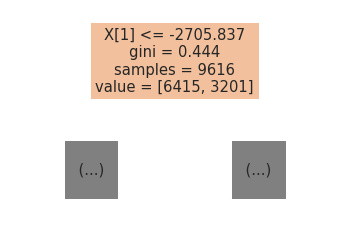

In [ ]:
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)
print('DecidionTree')
print('訓練集正確率: ', dt.score(x_train, y_train))
print('測試集正確率: ', dt.score(x_test, y_test))

cnf = confusion_matrix(y_train, dt.predict(x_train))
print('訓練集混淆矩陣: \n', cnf)
cnf = confusion_matrix(y_test, dt.predict(x_test))
print('測試集混淆矩陣: \n', cnf)

tree.plot_tree(dt,max_depth=0, filled = True)

# **RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10)
rfc.fit(x_train, y_train)

print('測試集混淆矩陣:')
rfc_pred = rfc.predict(x_test)
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))
print('accracy : ' , rfc.score(x_test, y_test))

print('\n訓練集混淆矩陣: ')
rfc_pred = rfc.predict(x_train)
print(confusion_matrix(y_train, rfc_pred))
print(classification_report(y_train, rfc_pred))
print('accracy : ',rfc.score(x_train, y_train))

測試集混淆矩陣:
[[1353  246]
 [ 643  163]]
              precision    recall  f1-score   support

         0.0       0.68      0.85      0.75      1599
         1.0       0.40      0.20      0.27       806

    accuracy                           0.63      2405
   macro avg       0.54      0.52      0.51      2405
weighted avg       0.58      0.63      0.59      2405

accracy :  0.6303534303534304

訓練集混淆矩陣: 
[[6405   10]
 [ 273 2928]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      6415
         1.0       1.00      0.91      0.95      3201

    accuracy                           0.97      9616
   macro avg       0.98      0.96      0.97      9616
weighted avg       0.97      0.97      0.97      9616

accracy :  0.9705698835274542


# **KNN(K=4)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
#for i in range(1,10):
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print('\n')
print('\n測試集混淆矩陣: ')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('accracy : ' ,knn.score(x_test, y_test))

print('\n訓練集混淆矩陣: ')
knn_pred = knn.predict(x_train)
print(confusion_matrix(y_train, knn_pred))
print(classification_report(y_train, knn_pred))
print('accracy : ',knn.score(x_train, y_train))





測試集混淆矩陣: 
[[1428  171]
 [ 688  118]]
              precision    recall  f1-score   support

         0.0       0.67      0.89      0.77      1599
         1.0       0.41      0.15      0.22       806

    accuracy                           0.64      2405
   macro avg       0.54      0.52      0.49      2405
weighted avg       0.59      0.64      0.58      2405

accracy :  0.6428274428274429

訓練集混淆矩陣: 
[[6164  251]
 [2260  941]]
              precision    recall  f1-score   support

         0.0       0.73      0.96      0.83      6415
         1.0       0.79      0.29      0.43      3201

    accuracy                           0.74      9616
   macro avg       0.76      0.63      0.63      9616
weighted avg       0.75      0.74      0.70      9616

accracy :  0.7388727121464226


# **LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(x_train , y_train)

#test
Lr_pred = Lr.predict(x_test)
cm = confusion_matrix(y_test, Lr_pred)
print('測試集混淆矩陣:')
print(cm)
print(classification_report(y_test,Lr_pred))
print('accracy : ',Lr.score(x_test, y_test))


#train
Lr_pred_train = Lr.predict(x_train)
cm = confusion_matrix(y_train, Lr_pred_train)
print('\n訓練集混淆矩陣: ')
print(cm)
print(classification_report(y_train,Lr_pred_train))
print('accracy : ',Lr.score(x_train, y_train))

import numpy as np
np.round(Lr.predict_proba(x_test),3)

測試集混淆矩陣:
[[1599    0]
 [ 806    0]]
              precision    recall  f1-score   support

         0.0       0.66      1.00      0.80      1599
         1.0       0.00      0.00      0.00       806

    accuracy                           0.66      2405
   macro avg       0.33      0.50      0.40      2405
weighted avg       0.44      0.66      0.53      2405

accracy :  0.6648648648648648

訓練集混淆矩陣: 
[[6415    0]
 [3201    0]]
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80      6415
         1.0       0.00      0.00      0.00      3201

    accuracy                           0.67      9616
   macro avg       0.33      0.50      0.40      9616
weighted avg       0.45      0.67      0.53      9616

accracy :  0.6671173044925125


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[0.701, 0.299],
       [0.671, 0.329],
       [0.668, 0.332],
       ...,
       [0.683, 0.317],
       [0.718, 0.282],
       [0.699, 0.301]])

# **GausssianNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors = None)
gnb_fit = gnb.fit(x_train, y_train)

gnb_pred = gnb.predict(x_test)
print('測試集混淆矩陣:')
print(confusion_matrix(y_test, gnb_pred))
print(classification_report(y_test, gnb_pred))
print('accracy : ',gnb.score(x_test, y_test))


gnb_pred = gnb.predict(x_train)
print('訓練集混淆矩陣:')
print(confusion_matrix(y_train, gnb_pred))
print(classification_report(y_train, gnb_pred))
print('accracy : ',gnb.score(x_train, y_train))



測試集混淆矩陣:
[[1599    0]
 [ 806    0]]
              precision    recall  f1-score   support

         0.0       0.66      1.00      0.80      1599
         1.0       0.00      0.00      0.00       806

    accuracy                           0.66      2405
   macro avg       0.33      0.50      0.40      2405
weighted avg       0.44      0.66      0.53      2405

accracy :  0.6648648648648648
訓練集混淆矩陣:
[[6415    0]
 [3201    0]]
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80      6415
         1.0       0.00      0.00      0.00      3201

    accuracy                           0.67      9616
   macro avg       0.33      0.50      0.40      9616
weighted avg       0.45      0.67      0.53      9616

accracy :  0.6671173044925125


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **ROC**

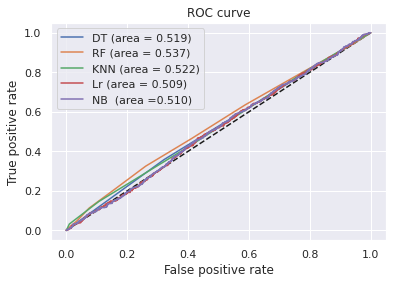

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#df
dt_pred = dt.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_pred)
auc_dt = auc(fpr_dt, tpr_dt)

#randomforest
rfc_pred = rfc.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rfc_pred)
auc_rf = auc(fpr_rf, tpr_rf)

#knn
knn_pred = knn.predict_proba(x_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_pred)
auc_knn = auc(fpr_knn, tpr_knn)

#Lr
Lr_pred = Lr.predict_proba(x_test)[:, 1]
fpr_Lr, tpr_Lr, thresholds_Lr = roc_curve(y_test, Lr_pred)
auc_Lr = auc(fpr_Lr, tpr_Lr)

#NB
gnb_pred = gnb_fit.predict_proba(x_test)[:, 1]
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, gnb_pred)
auc_gnb = auc(fpr_gnb, tpr_gnb)

#roc curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_dt, tpr_dt, label='DT (area = {:.3f})'.format(auc_dt))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.plot(fpr_knn, tpr_knn, label='KNN (area = {:.3f})'.format(auc_knn))
plt.plot(fpr_Lr, tpr_Lr, label='Lr (area = {:.3f})'.format(auc_Lr))
plt.plot(fpr_gnb, tpr_gnb, label= 'NB  (area ={:.3f})'.format(auc_gnb))


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()